In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime 

orders = pd.read_excel("Dataset.xlsx", sheet_name =0)
product = pd.read_excel("Dataset.xlsx", sheet_name =1)
location = pd.read_excel("Dataset.xlsx", sheet_name =2)
customer = pd.read_excel("Dataset.xlsx", sheet_name =3)
returns =pd.read_excel("Dataset.xlsx", sheet_name =4)
scoretable = pd.read_excel("Dataset.xlsx", sheet_name =5)
orders.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Price,Discount,Profit
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945,0.0,56.5110
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546,0.2,12.1176
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003,0.0,2.7279
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950,0.2,19.7910
4,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10002103,13.904,2,4.6926,0.2,4.5188


In [2]:
# filter successful order (exclude returns)
valid_order= orders.merge(returns, on = "Order ID" , how= "left",indicator = True )
valid_order_list= valid_order.loc[valid_order["_merge"]=="left_only", "Order ID"]
success_order= valid_order[valid_order["Order ID"].isin(valid_order_list)]
success_order

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Price,Discount,Profit,Returned,_merge
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945,0.0,56.5110,NaN,left_only
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546,0.2,12.1176,NaN,left_only
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003,0.0,2.7279,NaN,left_only
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950,0.2,19.7910,NaN,left_only
6,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Consumer,80538,OFF-FA-10003472,3.024,3,1.2096,0.2,-0.6048,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Consumer,19143,OFF-AR-10003478,19.536,3,4.8840,0.2,4.8840,NaN,left_only
9990,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-LA-10003223,11.784,3,2.5041,0.2,4.2717,NaN,left_only
9991,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-ST-10002743,272.736,3,112.5036,0.2,-64.7748,NaN,left_only
9992,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-BI-10004094,3.540,2,4.5135,0.8,-5.4870,NaN,left_only


In [3]:
# R score
final = success_order.groupby("Customer ID").agg({'Order Date': 'max', 'Order ID': 'nunique', 'Sales': 'sum'})


In [4]:
final = final.reset_index()
final

,Customer ID,Order Date,Order ID,Sales
0,AA-10315,2017-06-29,5,5563.560
1,AA-10375,2017-12-11,9,1056.390
2,AA-10480,2017-04-15,4,1790.512
3,AA-10645,2016-09-04,5,5073.975
4,AB-10015,2016-11-10,3,886.156
...,...,...,...,...
786,XP-21865,2017-10-09,9,2110.726
787,YC-21895,2017-12-26,4,5438.650
788,YS-21880,2017-12-21,8,6720.444
789,ZC-21910,2017-11-06,12,7892.998


In [5]:
final=final.rename(columns = {'Order Date':'last_date', 'Order ID' : 'Frequency', 'Sales':'Monetary' })


In [6]:
d_day = datetime.datetime.strptime('2017-12-31', '%Y-%m-%d')
final["Recency"] = d_day - final['last_date']
final.head()

,Customer ID,last_date,Frequency,Monetary,Recency
0,AA-10315,2017-06-29,5,5563.560,185 days
1,AA-10375,2017-12-11,9,1056.390,20 days
2,AA-10480,2017-04-15,4,1790.512,260 days
3,AA-10645,2016-09-04,5,5073.975,483 days
4,AB-10015,2016-11-10,3,886.156,416 days


In [7]:
rscore = ["5", "4", "3", "2", "1"]
fscore = ["1","2","3","4","5"]
mscore = ["1","2","3","4","5"]
final["r"]= pd.qcut(final["Recency"], q =5, labels= rscore)
final["f"]= pd.qcut(final["Frequency"], q =5, labels= fscore)
final["m"]= pd.qcut(final["Monetary"], q =5, labels= mscore)

final.head()



,Customer ID,last_date,Frequency,Monetary,Recency,r,f,m
0,AA-10315,2017-06-29,5,5563.560,185 days,2,2,5
1,AA-10375,2017-12-11,9,1056.390,20 days,5,5,2
2,AA-10480,2017-04-15,4,1790.512,260 days,2,1,3
3,AA-10645,2016-09-04,5,5073.975,483 days,1,2,5
4,AB-10015,2016-11-10,3,886.156,416 days,1,1,2


In [8]:
final.dtypes

Customer ID             object
last_date       datetime64[ns]
Frequency                int64
Monetary               float64
Recency        timedelta64[ns]
r                     category
f                     category
m                     category
dtype: object

In [9]:
final["RFM Score"] = final["r"].astype("str")  +final["f"].astype("str")  + final["m"].astype("str") 
final.head()


,Customer ID,last_date,Frequency,Monetary,Recency,r,f,m,RFM Score
0,AA-10315,2017-06-29,5,5563.560,185 days,2,2,5,225
1,AA-10375,2017-12-11,9,1056.390,20 days,5,5,2,552
2,AA-10480,2017-04-15,4,1790.512,260 days,2,1,3,213
3,AA-10645,2016-09-04,5,5073.975,483 days,1,2,5,125
4,AB-10015,2016-11-10,3,886.156,416 days,1,1,2,112


In [10]:
scoretable["RFM Score"] = scoretable["RFM Score"].str.split(',')
scoretable

,Segment,RFM Score
0,Champions,"[555, 554, 544, 545, 454, 455, 445]"
1,Loyal,"[543, 444, 435, 355, 354, 345, 344, 335]"
2,Potential Loyalist,"[553, 551, 552, 541, 542, 533, 532, 531..."
3,New Customers,"[512, 511, 422, 421, 412, 411, 311]"
4,Promising,"[525, 524, 523, 522, 521, 515, 514, 513..."
5,Need Attention,"[535, 534, 443, 434, 343, 334, 325, 324]"
6,About To Sleep,"[331, 321, 312, 221, 213, 231, 241, 251]"
7,At Risk,"[255, 254, 245, 244, 253, 252, 243, 242..."
8,Cannot Lose Them,"[155, 154, 144, 214, 215, 115, 114, 113]"
9,Hibernating customers,"[332, 322, 233, 232, 223, 222, 132, 123..."


In [11]:
finalscore = scoretable.explode("RFM Score")
finalscore["RFM Score"] = finalscore["RFM Score"].astype("str")
finalscore


,Segment,RFM Score
0,Champions,555
0,Champions,554
0,Champions,544
0,Champions,545
0,Champions,454
...,...,...
10,Lost customers,112
10,Lost customers,121
10,Lost customers,131
10,Lost customers,141


In [12]:
print(final.dtypes)
print(finalscore.dtypes)

Customer ID             object
last_date       datetime64[ns]
Frequency                int64
Monetary               float64
Recency        timedelta64[ns]
r                     category
f                     category
m                     category
RFM Score               object
dtype: object
Segment      object
RFM Score    object
dtype: object


In [13]:
final["RFM Score"] = final["RFM Score"].astype("int")
finalscore["RFM Score"] = finalscore["RFM Score"].astype("int")
merge_score= final.merge(finalscore, on = "RFM Score", how = "left")
merge_score

,Customer ID,last_date,Frequency,Monetary,Recency,r,f,m,RFM Score,Segment
0,AA-10315,2017-06-29,5,5563.560,185 days,2,2,5,225,At Risk
1,AA-10375,2017-12-11,9,1056.390,20 days,5,5,2,552,Potential Loyalist
2,AA-10480,2017-04-15,4,1790.512,260 days,2,1,3,213,About To Sleep
3,AA-10645,2016-09-04,5,5073.975,483 days,1,2,5,125,At Risk
4,AB-10015,2016-11-10,3,886.156,416 days,1,1,2,112,Lost customers
...,...,...,...,...,...,...,...,...,...,...
786,XP-21865,2017-10-09,9,2110.726,83 days,3,5,3,353,Potential Loyalist
787,YC-21895,2017-12-26,4,5438.650,5 days,5,1,5,515,Promising
788,YS-21880,2017-12-21,8,6720.444,10 days,5,4,5,545,Champions
789,ZC-21910,2017-11-06,12,7892.998,55 days,4,5,5,455,Champions


In [14]:
segment_view= merge_score.groupby("Segment").agg({"Customer ID": 'count', "Monetary": 'sum' })
segment_view= segment_view.reset_index()
segment_view = segment_view.rename(columns = {'Customer ID':'Number of Customers', 'Monetary' : 'Total Sales'})
segment_view["Customer %"] = (segment_view["Number of Customers"]/segment_view["Number of Customers"].sum())*100
segment_view["Sales %"] = (segment_view["Total Sales"]/segment_view["Total Sales"].sum())*100
segment_view

,Segment,Number of Customers,Total Sales,Customer %,Sales %
0,About To Sleep,44,47310.1172,5.562579,2.235092
1,At Risk,96,385996.8861,12.136536,18.235816
2,Cannot Lose Them,36,150229.9414,4.551201,7.097377
3,Champions,71,382096.5868,8.975980,18.051552
4,Hibernating customers,90,109960.2510,11.378003,5.194899
5,Lost customers,83,54264.2255,10.493047,2.563628
6,Loyal,62,270680.2154,7.838180,12.787861
7,Need Attention,72,259412.3922,9.102402,12.255530
8,New Customers,61,40997.1410,7.711757,1.936845
9,Potential Loyalist,113,190944.9303,14.285714,9.020893


In [15]:
segment_view["Customer %"] = segment_view["Customer %"].astype("str")
for lab, row in segment_view.iterrows() :
    segment_view.loc[lab, "Customer %_"] = row["Customer %"][0:4] + "%"

    segment_view["Sales %"] = segment_view["Sales %"].astype("str")
for lab, row in segment_view.iterrows() :
    segment_view.loc[lab, "Sales %_"] = row["Sales %"][0:4] + "%"

segment_view

,Segment,Number of Customers,Total Sales,Customer %,Sales %,Customer %_,Sales %_
0,About To Sleep,44,47310.1172,5.562579013906448,2.235092057755287,5.56%,2.23%
1,At Risk,96,385996.8861,12.13653603034134,18.23581562466267,12.1%,18.2%
2,Cannot Lose Them,36,150229.9414,4.551201011378002,7.097377236262314,4.55%,7.09%
3,Champions,71,382096.5868,8.97597977243995,18.05155212027426,8.97%,18.0%
4,Hibernating customers,90,109960.2510,11.378002528445007,5.194899066512519,11.3%,5.19%
5,Lost customers,83,54264.2255,10.493046776232617,2.5636279640265176,10.4%,2.56%
6,Loyal,62,270680.2154,7.83817951959545,12.787860936265663,7.83%,12.7%
7,Need Attention,72,259412.3922,9.102402022756005,12.255530355978902,9.10%,12.2%
8,New Customers,61,40997.1410,7.711757269279393,1.9368454289048698,7.71%,1.93%
9,Potential Loyalist,113,190944.9303,14.285714285714285,9.020892833090823,14.2%,9.02%


In [16]:
score_order = scoretable["Segment"].values.tolist()
sns.color_palette("Spectral", as_cmap=True)
score_order

['Champions',
 'Loyal',
 'Potential Loyalist',
 'New Customers',
 'Promising',
 'Need Attention',
 'About To Sleep',
 'At Risk',
 'Cannot Lose Them',
 'Hibernating customers',
 'Lost customers']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Champions'),
  Text(1, 0, 'Loyal'),
  Text(2, 0, 'Potential Loyalist'),
  Text(3, 0, 'New Customers'),
  Text(4, 0, 'Promising'),
  Text(5, 0, 'Need Attention'),
  Text(6, 0, 'About To Sleep'),
  Text(7, 0, 'At Risk'),
  Text(8, 0, 'Cannot Lose Them'),
  Text(9, 0, 'Hibernating customers'),
  Text(10, 0, 'Lost customers')])

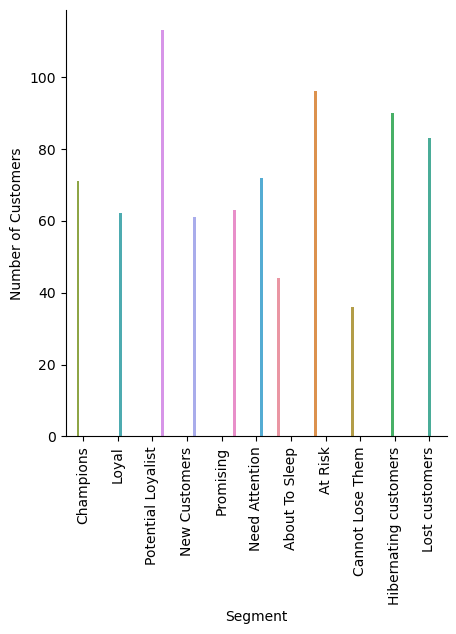

In [17]:
plt1 = sns.catplot(x= "Segment", y= "Number of Customers", data= segment_view, kind = "bar", hue = "Segment", order =score_order, legend= False)
plt.xticks(rotation = 90)


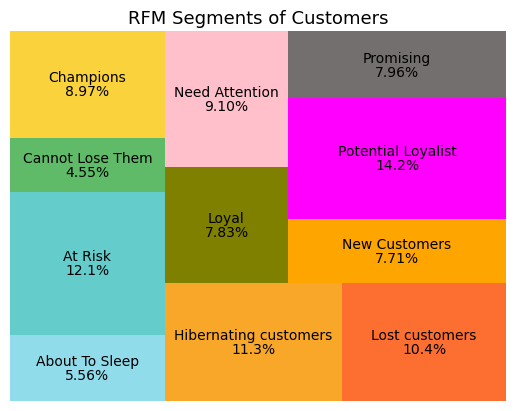

In [23]:
!pip install squarify
import squarify
colors = ['#91DCEA', '#64CDCC', '#5FBB68',
          '#F9D23C', '#F9A729', '#FD6F30','#808000','#FFC0CB','#FFA500','#FF00FF','#736F6E']
squarify.plot(sizes=segment_view["Number of Customers"], 
              label=segment_view['Segment'], value =segment_view["Customer %_"], color = colors)
plt.title('RFM Segments of Customers', fontsize=13)
plt.axis('off')
plt.show()

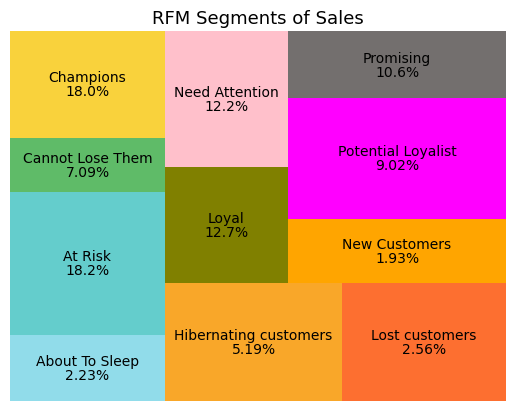

In [24]:
!pip install squarify
import squarify
colors = ['#91DCEA', '#64CDCC', '#5FBB68',
          '#F9D23C', '#F9A729', '#FD6F30','#808000','#FFC0CB','#FFA500','#FF00FF','#736F6E']
squarify.plot(sizes=segment_view["Number of Customers"], 
              label=segment_view['Segment'], value =segment_view["Sales %_"], color = colors)
plt.title('RFM Segments of Sales', fontsize=13)
plt.axis('off')
plt.show()

In [ ]:
Recommendations:
với qu mô là 1 cty bán lẻ toàn cầu, tỷ lệ RF và M thì R và F là tỷ lệ nên được quan tâm nhiều hơn. Biến mình là 1 phần của cuộc sống hằng ngày, kéo tỉ lệ R và F đi lên mới dần dần tác động đến M được.    
    
Champions: chăm sóc tốt với các gói ưu đãi đặc biệt, cross sell và upsell
Loyal: upsell, hỏi thăm thường xuyên
Potential Loyalist: giới thiệu các sản phẩm hot, ưu đãi khi mua nhiều sản phẩm
New Customers: ưu đãi bạn mới, offer voucher khi đạt các mức ...
Promising: chăm sóc hậu mãi, offer giảm giá
Need Attention: 
About To Sleep: giới thiệu các sản phẩm mới phù hợp lứa tuổi và hành vi tiêu dùng, nhóm này cần research thêm dựa vào các hành vi và sở thích
At Risk: gọi điện trực tiếp, xin lỗi chan thành nếu có vđ, hỏi thăm
Cannot Lose Them: hỏi thăm và chia sẻ, có thể offer những ưu đãi đặc biệt, cho cụ thể 1 nhóm support hoặc sales take care
Hibernating customers: gửi gmail offer trong 1 thời gian và xem phản hồi, gửi mail khảo sát lí do rời đi, nếu k tích cực thì bỏ qua và dồn lực vào các nhóm trên, nhưng bắt buộc phải tìm được lí do để không được để khách đi mất nữa 
Lost customers: gửi gmail offer trong 1 thời gian và xem phản hồi,gửi mail khảo sát lí do rời đi, nếu k tích cực thì bỏ qua và dồn lực vào các nhóm trên, nhưng bắt buộc phải tìm được lí do để không được để khách đi mất nữa 
Lost customers: gửi gmail offer trong 1 thời gian và xem phản hồi,gửi mail khảo sát lí do rời đi, nếu k tích cực thì bỏ qua và dồn lực vào các nhóm trên, nhưng